In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df= pd.read_csv('../input/buenos-aires-airbnb-data/Buenos_Aires_AIRBNB.csv')
df.head()

In [ ]:
df.describe().transpose()

In [ ]:
df.isnull().sum()


In [ ]:
df[df['last_review'].isnull()][['last_review','reviews_per_month']]

In [ ]:
df['last_review'].fillna(0,inplace=True)

In [ ]:
df['reviews_per_month'].fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.drop(columns=['name','host_id','host_name','id'])


In [ ]:
df['last_review']= pd.to_datetime(df['last_review'])

In [ ]:
df['year_last_review']= df['last_review'].apply(lambda date: date.year)

In [ ]:
df['month_last_review'] = df['last_review'].apply(lambda date: date.month)

In [ ]:
df.head()

In [ ]:
sns.countplot(df['year_last_review'])

In [ ]:
sns.countplot(df[df['year_last_review']>=2010]['month_last_review'])
plt.title('Rates')

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude',y='price',data=df)

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='price',y='latitude',data=df)

In [ ]:
top=df[df['price']>10000]['price'].count()

In [ ]:
bot=df[df['price']<10000]['price'].count()

In [ ]:
top/df['price'].count()

2.66% is top appertments

In [ ]:
sns.distplot(df[df['price']<=10000]['price'])

In [ ]:
without_top= df[df['price']<10000]
top        = df[df['price']>10000]

In [ ]:
plt.figure(figsize=(10,10))

sns.scatterplot(x='longitude',y='latitude',data=without_top,hue='price',alpha=0.3,edgecolor=None,palette='YlOrRd')

In [ ]:
rich_loc=df[(df['longitude']>-58.375) & (df['longitude']<-58.35)].sort_values('price',ascending=False)

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(rich_loc.head(500)['neighbourhood'])
plt.tight_layout()

Puerto Madero is the red expensive area 

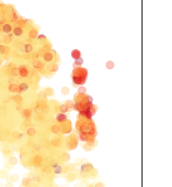


In [ ]:
df['neighbourhood'].nunique()

In [ ]:
neighbourhoods = df['neighbourhood'].unique()
avarage_price = dict()
count_nh = dict()
for neighbour in neighbourhoods:
    avarage_price[neighbour] = df[df['neighbourhood']==neighbour]['price'].mean()
    count_nh[neighbour]      = df[df['neighbourhood']==neighbour]['price'].count()


In [ ]:
nh_ser   = pd.Series(avarage_price)
count_nh = pd.Series(count_nh)

# Top 10 neighbourhoods to take airbnb

In [ ]:
df2=pd.DataFrame(nh_ser)
df2.columns=['AVG']

df3=pd.DataFrame(count_nh)
df3.columns=['Count']
df3
by_nhd=pd.concat([df2,df3],axis=1)
by_nhd['tot']=by_nhd['AVG']*by_nhd['Count']
by_nhd['Rate Percent']=round((by_nhd['tot']/by_nhd['tot'].sum())*100,2)
by_nhd.sort_values('tot',ascending=False).head(10)